<a href="https://colab.research.google.com/github/AntonioCRCosta/antonio-c-r-costa/blob/main/Trabalho_lab_de_computa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno : Antônio Costa

Professor : Bruno Ottoni

Monitora : Ana Wagner

Fundaçao Getúlio Vargas EPGE

Título do trabalho: Correlação dos ciclos do setores de frigoríficos do Brasil com os EUA

Meta do trabalho: Fazer uma analise comparativa do preço do gado e porco americanos com principais empresas do ramo alimentício de carne de porco e vaca brasileiras pela base de dados do yfinance. O objetivo principal, além de fazer uma analise básica do setor, é  tentar olhar a baixa correlação do ciclo do gado e do porco nos USA com o do Brasil.

In [ ]:
#Instalando a biblioteca
!pip install yfinance

In [ ]:
#Importando a biblioteca do yfinance
import yfinance as yf

#Importando as bibliotecas bases para análises de dados
import matplotlib as mt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
#Baixando dados dos índices das empresas
jbs = yf.download('JBSS3.SA', start='2010-11-19', end='2023-11-19')['Close']
marfig = yf.download('MRFG3.SA', start='2010-11-19', end='2023-11-19')['Close']
minupar = yf.download('MNPR3.SA', start='2010-11-19', end='2023-11-19')['Close']
minerva = yf.download('BEEF3.SA', start='2010-11-19', end='2023-11-19')['Close']
excelsior = yf.download('BAUH4.SA', start='2010-11-19', end='2023-11-19')['Close']
brf = yf.download('BRFS3.SA', start='2010-11-19', end='2023-11-19')['Close']
#Baixando dados do gado e do porco
gado = yf.download('LE=F', start='2010-11-19', end='2023-11-19')['Close']
porco = yf.download('HE=F', start='2010-11-19', end='2023-11-19')['Close']



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


"Lean Hog" que eu vou usar com a variável "porco" é um tipo de contrato futuro de porco (carne suína) que pode ser usado para hedge e especulação sobre os preços da carne suína nos EUA.

O "Live cattle" é um tipo de contrato futuro que pode ser usado para fazer hedge e especular sobre os preços do gado alimentado.

Os outros índices represantam as principais empresas do ramo frigorífico no Brasil.


In [ ]:
all = pd.concat([jbs, marfig, minupar, minerva, excelsior, brf, gado, porco], axis=1)#concatenei todas as séries
all.columns = ['jbs', 'marfig', 'minupar', 'minerva', 'excelsior', 'brf', 'gado', 'porco']

In [ ]:
from re import M

#Organizando como séries temporais.
#Para usar dados de todos os dias, usamos a frequência 'B' (bussiness day)
#indexarei também as séries temporais
jbs = pd.Series(all['jbs'].values, index=pd.date_range(start='2010-01-10', periods=len(all), freq='B'))
marfig = pd.Series(all['marfig'].values, index=pd.date_range(start='2010-01-10', periods=len(all), freq='B'))
minupar = pd.Series(all['minupar'].values, index=pd.date_range(start='2010-01-10', periods=len(all), freq='B'))
minerva = pd.Series(all['minerva'].values, index=pd.date_range(start='2010-01-10', periods=len(all), freq='B'))
excelsior = pd.Series(all['excelsior'].values, index=pd.date_range(start='2010-01-10', periods=len(all), freq='B'))
brf = pd.Series(all['brf'].values, index=pd.date_range(start='2010-01-10', periods=len(all), freq='B'))
gado = pd.Series(all['gado'].values, index=pd.date_range(start='2010-01-10', periods=len(all), freq='B'))
porco = pd.Series(all['porco'].values, index=pd.date_range(start='2010-01-10', periods=len(all), freq='B'))

#Definindo a frequência como 252 (número de dias úteis no ano)
jbs = jbs.asfreq('B').asfreq('B', method='pad')
marfig = marfig.asfreq('B').asfreq('B', method='pad')
minupar = minupar.asfreq('B').asfreq('B', method='pad')
minerva = minerva.asfreq('B').asfreq('B', method='pad')
excelsior = excelsior.asfreq('B').asfreq('B', method='pad')
brf = brf.asfreq('B').asfreq('B', method='pad')
gado = gado.asfreq('B').asfreq('B', method='pad')
porco = porco.asfreq('B').asfreq('B', method='pad')

#juntando tudo
all1 = pd.concat([jbs, marfig, minupar, minerva, excelsior, brf, gado, porco], axis=1)
all1.columns = ['jbs', 'marfig', 'minupar', 'minerva', 'excelsior', 'brf', 'gado', 'porco']
all1


,jbs,marfig,minupar,minerva,excelsior,brf,gado,porco
2010-01-11,6.310000,13.46,35.00,6.401249,2.750000,24.770000,101.449997,69.125000
2010-01-12,6.250000,13.55,35.00,6.411082,2.900000,24.400000,100.925003,69.400002
2010-01-13,6.060000,13.37,35.00,6.194757,2.710000,23.900000,101.550003,69.824997
2010-01-14,6.450000,13.50,35.00,6.479912,2.710000,25.110001,101.925003,70.375000
2010-01-15,6.460000,13.45,36.00,6.499578,2.710000,24.900000,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-11-14,21.000000,7.56,17.42,6.880000,71.889999,12.310000,174.925003,73.349998
2022-11-15,20.879999,7.90,17.67,7.040000,71.889999,12.830000,175.850006,72.300003
2022-11-16,NaN,NaN,NaN,NaN,NaN,NaN,177.774994,71.050003
2022-11-17,21.660000,8.39,17.98,7.210000,71.889999,13.860000,174.750000,71.474998


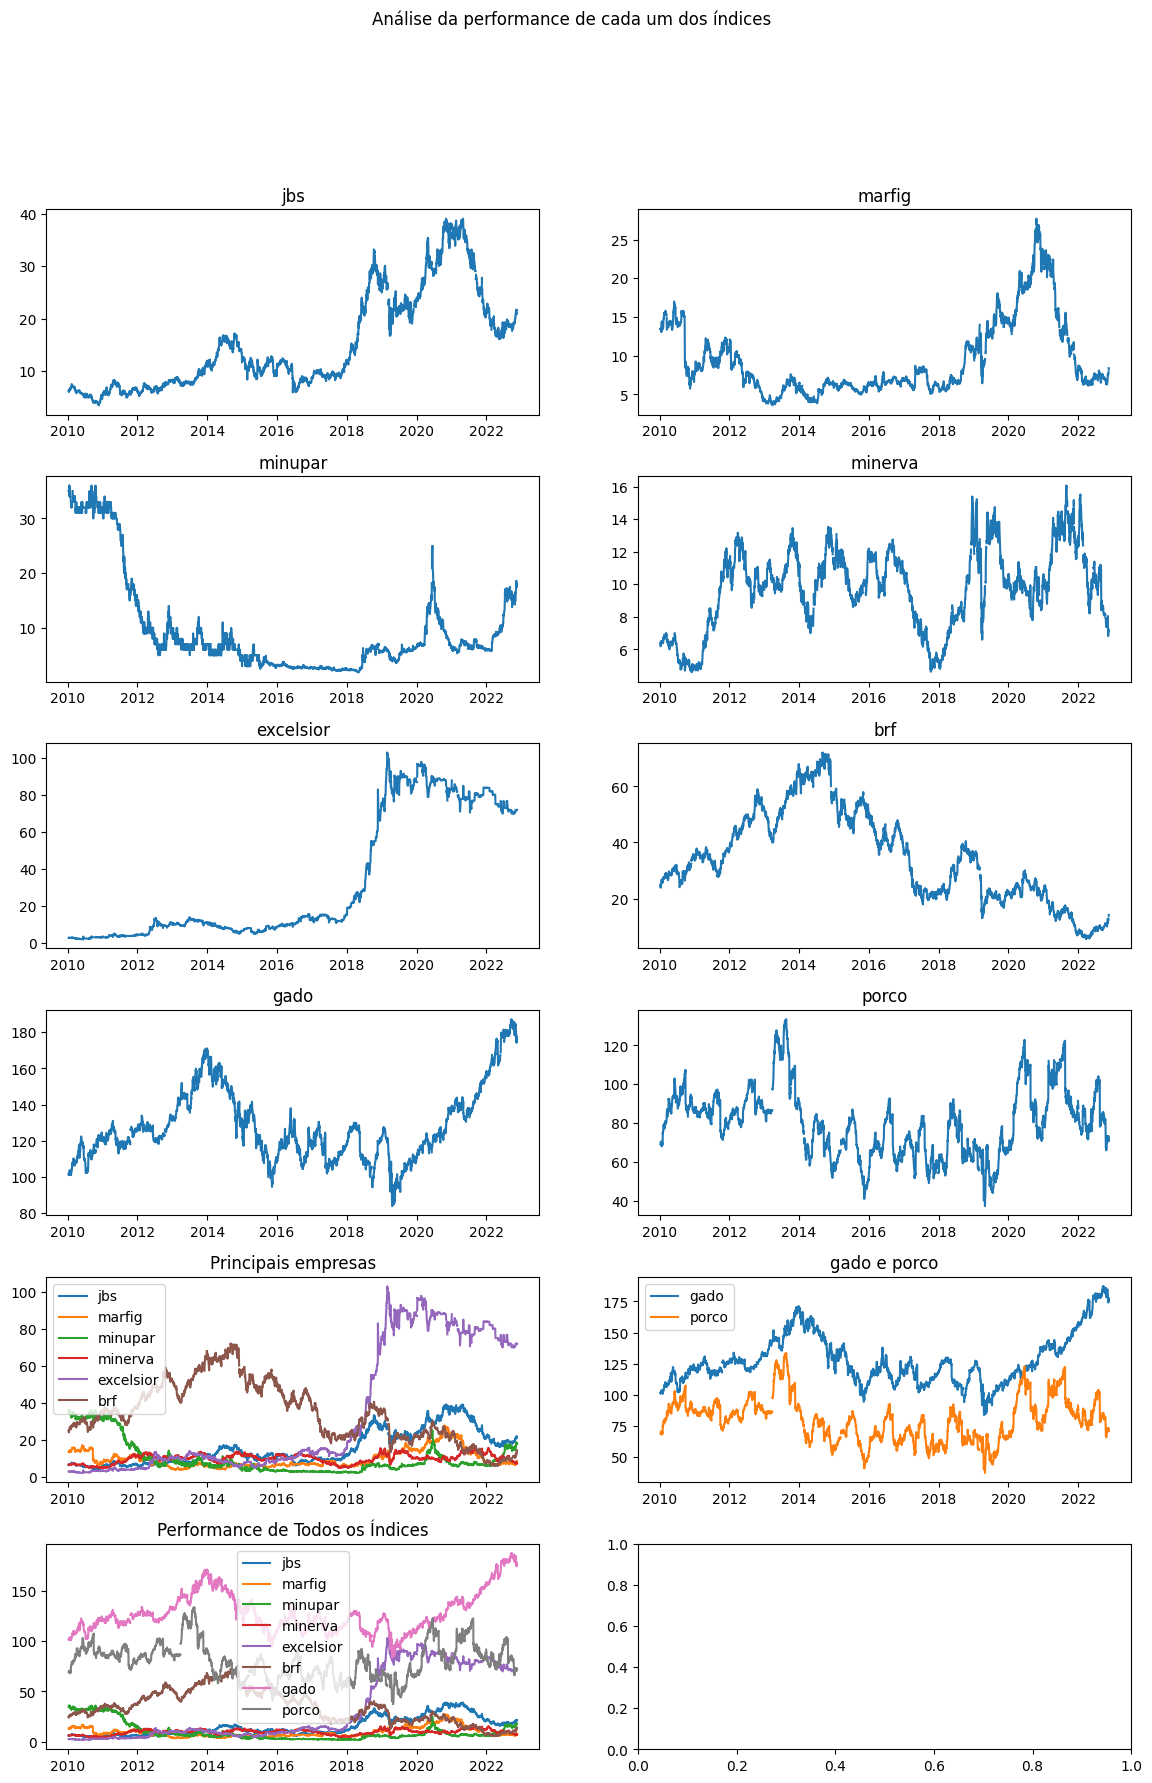

In [ ]:
#Visualizando a performance histórica de cada uma das séries temporais
#essa forma de visualisar é pouco interessante por não botar todos os ativos em um mesmo patamar inicial. Para comprovar isso, vou fazer primeiro
# dessa forma e depois deixar todos começando de um mesmo ponto para, portanto, concluir se realmente é mais eficaz para analizar os retornos.
#esse método de plotar é um pouco rudimentar e consome linhas, mas foi uma maneira prática que eu encontrei para fazer essa primeria análise.
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 20))
fig.suptitle('Análise da performance de cada um dos índices')
plt.rcParams['text.usetex'] = False
#jbs
axes[0, 0].plot(jbs)
axes[0, 0].set_title('jbs')
#marfig
axes[0, 1].plot(marfig)
axes[0, 1].set_title('marfig')
#minupar
axes[1, 0].plot(minupar)
axes[1, 0].set_title('minupar')
#mineva
axes[1, 1].plot(minerva)
axes[1, 1].set_title('minerva')
#excelsior
axes[2, 0].plot(excelsior)
axes[2, 0].set_title('excelsior')
#brf
axes[2, 1].plot(brf)
axes[2, 1].set_title('brf')
#gado
axes[3, 0].plot(gado)
axes[3, 0].set_title('gado')
#porco
axes[3, 1].plot(porco)
axes[3, 1].set_title('porco')
#Todos as ações
axes[4, 0].plot(jbs, label='jbs')
axes[4, 0].plot(marfig, label='marfig')
axes[4, 0].plot(minupar, label='minupar')
axes[4, 0].plot(minerva, label='minerva')
axes[4, 0].plot(excelsior, label='excelsior')
axes[4, 0].plot(brf, label='brf')
axes[4, 0].set_title('Principais empresas')
axes[4, 0].legend()  #Adicionando legenda para cada uma das séries
#gado e porco
axes[4, 1].plot(gado, label='gado')
axes[4, 1].plot(porco, label='porco')
axes[4, 1].set_title('gado e porco')
axes[4, 1].legend()  #Adicionando legenda para cada uma das séries
#todos os índices juntos
axes[5, 0].plot(jbs, label='jbs')
axes[5, 0].plot(marfig, label='marfig')
axes[5, 0].plot(minupar, label='minupar')
axes[5, 0].plot(minerva, label='minerva')
axes[5, 0].plot(excelsior, label='excelsior')
axes[5, 0].plot(brf, label='brf')
axes[5, 0].plot(gado, label='gado')
axes[5, 0].plot(porco, label='porco')
axes[5, 0].set_title('Performance de Todos os Índices')
axes[5, 0].legend()

fig.subplots_adjust(hspace=0.3)  #Ajustando o espaçamento vertical
plt.show()

In [ ]:
#concatenando todas os índices e botei todos começando dessa linha
all2 = all1.pct_change()
all2 = (1 + all2).cumprod()
print(all2)
#Verificando se há NaN no DataFrame:
nan_check = all2.isna().sum()
print(nan_check)


                 jbs    marfig   minupar   minerva  excelsior       brf  \
2010-01-11       NaN       NaN       NaN       NaN        NaN       NaN   
2010-01-12  0.990491  1.006686  1.000000  1.001536   1.054545  0.985063   
2010-01-13  0.960380  0.993314  1.000000  0.967742   0.985455  0.964877   
2010-01-14  1.022187  1.002972  1.000000  1.012289   0.985455  1.013726   
2010-01-15  1.023772  0.999257  1.028571  1.015361   0.985455  1.005248   
...              ...       ...       ...       ...        ...       ...   
2022-11-14  3.328051  0.561664  0.497714  1.074790  26.141818  0.496972   
2022-11-15  3.309033  0.586924  0.504857  1.099785  26.141818  0.517965   
2022-11-16  3.309033  0.586924  0.504857  1.099785  26.141818  0.517965   
2022-11-17  3.432647  0.623328  0.513714  1.126343  26.141818  0.559548   
2022-11-18  3.429477  0.610698  0.511429  1.113845  26.138181  0.573678   

                gado     porco  
2010-01-11       NaN       NaN  
2010-01-12  0.994825  1.003978  


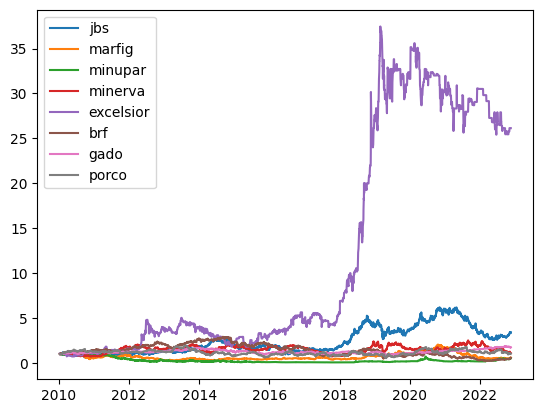

In [ ]:
#plotei o gráfico e consertei o código
all2 = all2.iloc[1:]#cortei a primeira linha
plt.plot(all2)
plt.legend(['jbs', 'marfig', 'minupar', 'minerva', 'excelsior', 'brf', 'gado', 'porco'])


com base nesse gráfico que definia todas em um mesmo patamar inicial é notável excelcior apresenta maiores rendimentos e de maneira geral é mais eficiente para visualizar os rendimentos.

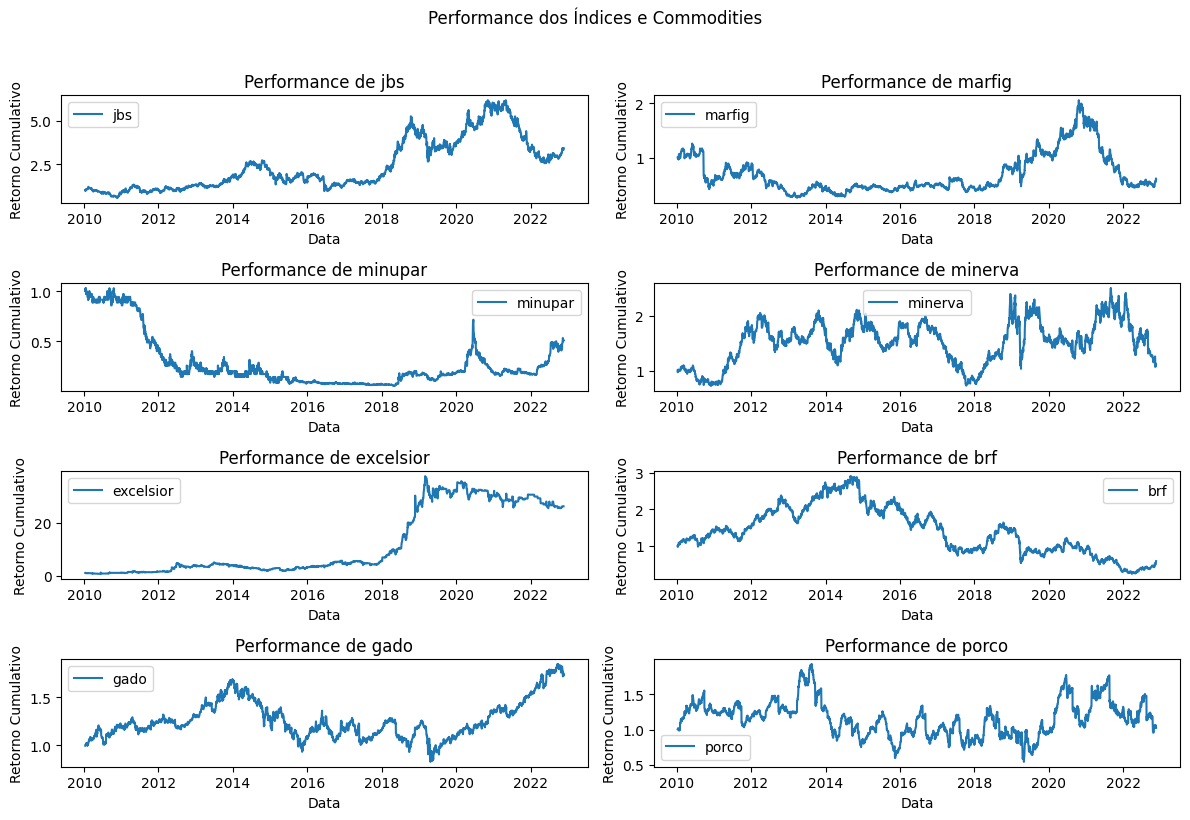

In [ ]:
#plotando os gráficos separadamente:
num_cols = 2# Definindo o número de colunas para 2 gráficos por linha
# Iterando as colunas
fig, axes = plt.subplots(nrows=len(all2.columns)//num_cols, ncols=num_cols, figsize=(12, 8))
fig.suptitle('Performance dos Índices e Commodities', y=1.02)
#plotando os gráficos organizadamente:
for i, column in enumerate(all2.columns):
    ax = axes[i//num_cols, i%num_cols]
    ax.plot(all2[column], label=column)
    ax.set_title(f'Performance de {column}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Retorno Cumulativo')
    ax.legend()
plt.tight_layout() #Ajustando o layout para evitar sobreposição
plt.show()

In [ ]:
#Tomando a primeira diferença do log.
djbs = np.diff(jbs)
dmarfig = np.diff(marfig)
dminupar = np.diff(minupar)
dminerva = np.diff(minerva)
dexcelsior = np.diff(excelsior)
dbrf = np.diff(brf)
dgado = np.diff(gado)
dporco = np.diff(porco)
all3 = pd.concat([jbs, marfig, minupar, minerva, excelsior, brf, gado, porco], axis=1)

#criando um DataFrame com a variação percentual entre os preços de fechamento em períodos consecutivos.
data = pd.DataFrame({'jbs': djbs, 'marfig': dmarfig, 'minupar': dminupar, 'minerva': dminerva, 'excelsior': dexcelsior, 'brf': dbrf, 'gado': dgado, 'porco' : dporco})
data

,jbs,marfig,minupar,minerva,excelsior,brf,gado,porco
0,-0.060000,0.09,0.000000,0.009833,0.150000,-0.370001,-0.524994,0.275002
1,-0.190000,-0.18,0.000000,-0.216325,-0.190000,-0.500000,0.625000,0.424995
2,0.390000,0.13,0.000000,0.285155,0.000000,1.210001,0.375000,0.550003
3,0.010000,-0.05,1.000000,0.019666,0.000000,-0.210001,NaN,NaN
4,-0.230000,-0.21,-1.000000,-0.088496,0.000000,-0.160000,NaN,NaN
...,...,...,...,...,...,...,...,...
3349,-0.309999,-0.04,-1.190001,0.040000,0.000000,0.160001,0.750000,1.449997
3350,-0.120001,0.34,0.250000,0.160000,0.000000,0.520000,0.925003,-1.049995
3351,NaN,NaN,NaN,NaN,NaN,NaN,1.924988,-1.250000
3352,NaN,NaN,NaN,NaN,NaN,NaN,-3.024994,0.424995


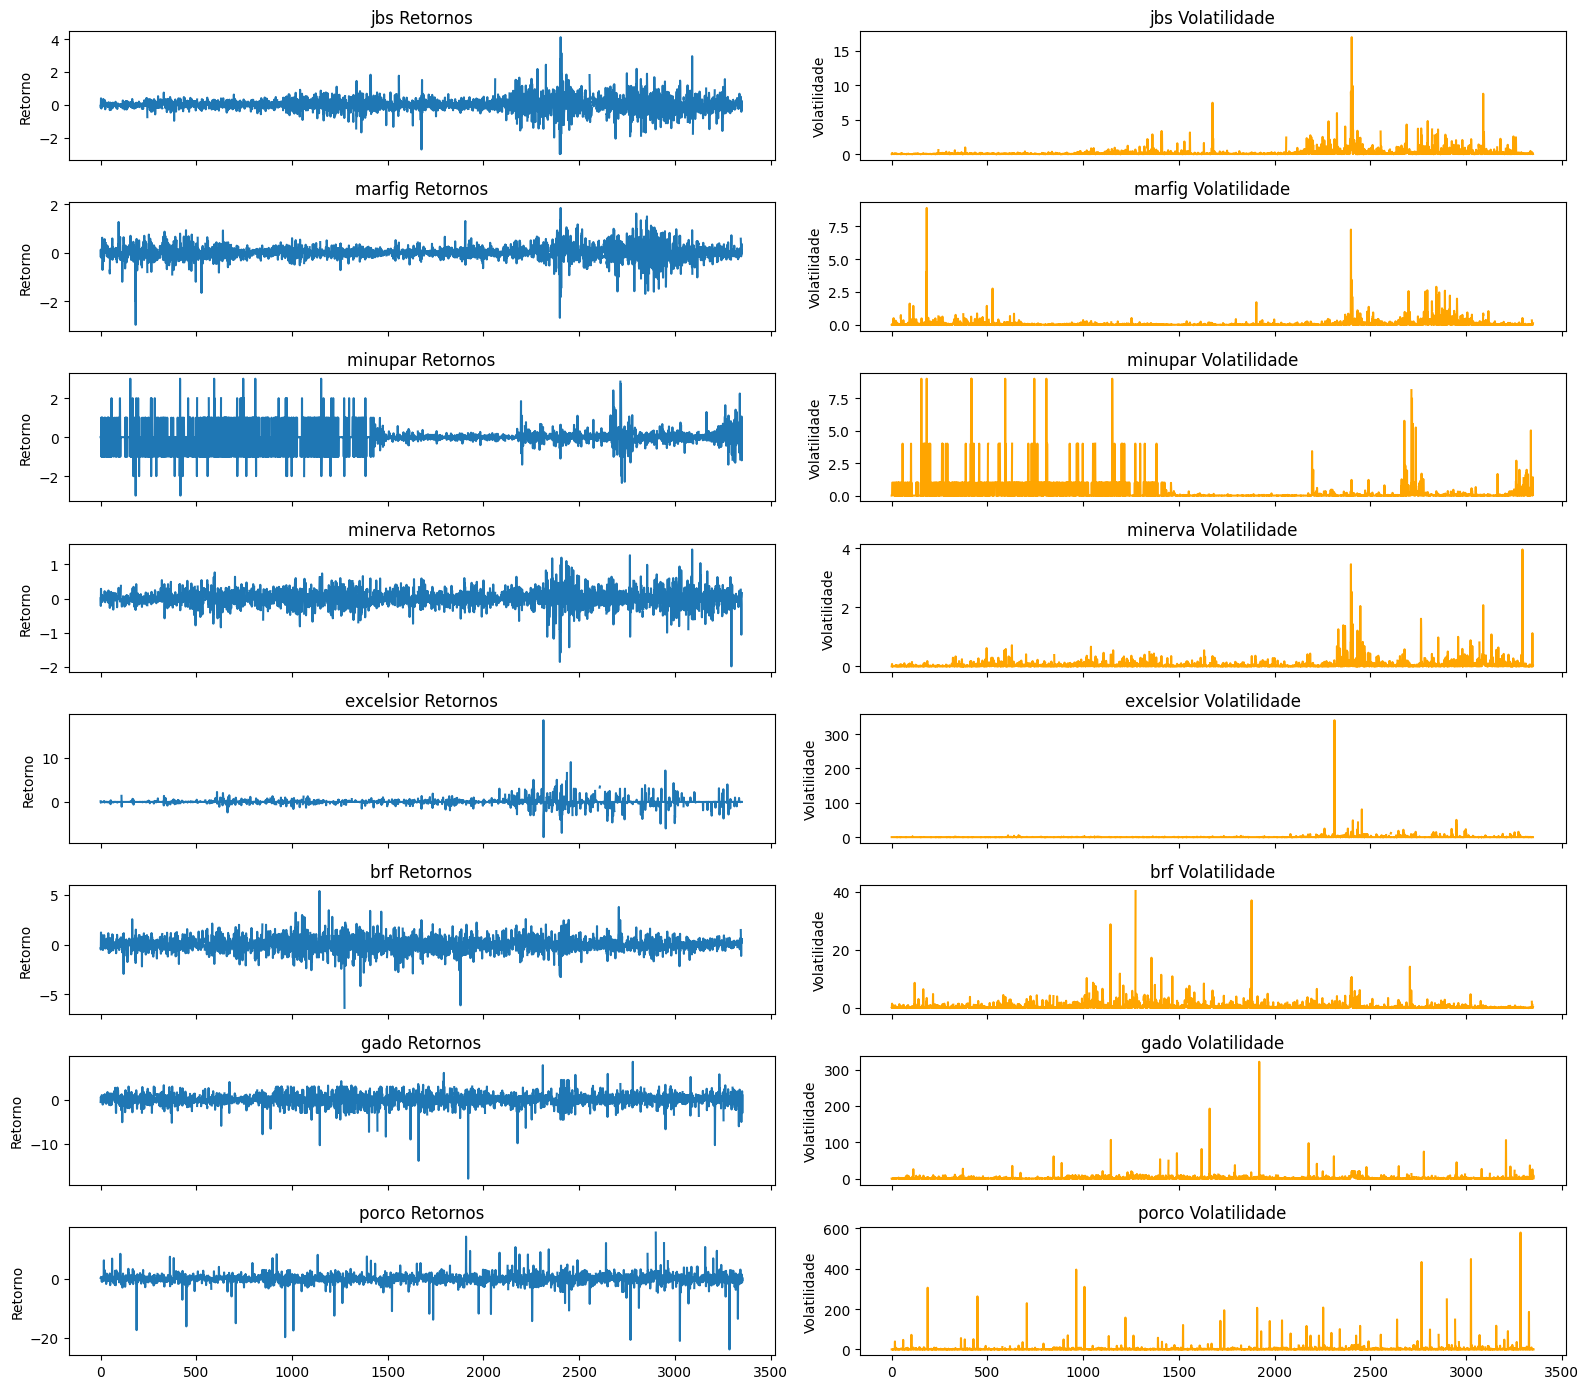

In [ ]:
#Calculando os retornos ao quadrado (variância)
variancia = data ** 2
#Criando um array de subplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(16, 14), sharex=True)
#Iterando sobre as colunas (séries temporais)
for i, column in enumerate(data.columns):
    #Plotando retornos no lado esquerdo
    axes[i, 0].plot(data.index, data[column], label=f'{column} Retornos')
    axes[i, 0].set_title(f'{column} Retornos')
    axes[i, 0].set_ylabel('Retorno')
    axes[i, 0].legend().set_visible(False)

    #Plotando volatilidade no lado direito
    axes[i, 1].plot(variancia.index, variancia[column], color='orange')
    axes[i, 1].set_title(f'{column} Volatilidade')
    axes[i, 1].set_ylabel('Volatilidade')
    axes[i, 1].legend().set_visible(False)

#Ajustando o layout para evitar sobreposiçã o
plt.tight_layout()
plt.show()



Com os gráficos do retorno e da volatilidade é notável uma maior oscilação apartir da observação 2000 das principais empresas brasileiras menos a brf, com uma ressalva no pico da excelsior que foi evendiaciada anteriormente com um pico em seus retornos.


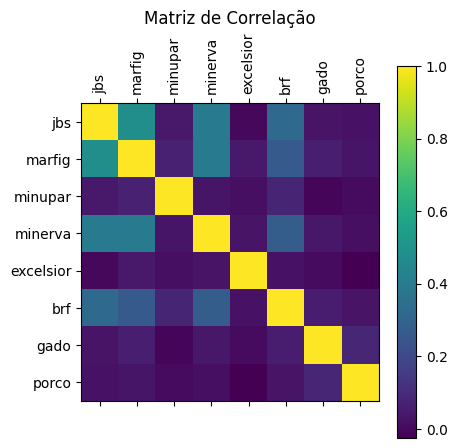

In [ ]:
#Análise Estática:

#Podemos avaliar a correlação entre os mercados e sua correlação com ouro e petróleo e o tesouro americano

#Calculando a matriz de correlação entre as séries temporais
correlation_matrix = data.corr()

#Plotando a matriz de correlação
plt.matshow(correlation_matrix, cmap='viridis')
plt.title('Matriz de Correlação')
plt.colorbar()

#Ajustando os rótulos do eixo x e y
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

#Exibindo o gráfico
plt.show()


Matriz de correlação: Uma maneira interativa de analisar a correlação de séries temporais, na qual a diagonal que vai da esquerda-cima para direita baixa representa a correlação de cada ativo e serve de “espelho” para suas duas metades. Nessa matriz é evidente que a JBS é a empresa do setor de frigorífico que apresenta mais vezes uma correlação mediana (por volta de 0.5) com o maior número de empresas. Excelsior apresenta as menores correlações.


A tese inicial da baixa correlação foi possível de ser analisada de maneira     eficiente, visto que os retornos das principais empresas do ramo frigorífico do Brasil apresentam baixa correlação com o preço do "gado vivo" e do "porco magro". Todavia, não é possível correlacionar o preço das commodities carne de porco e carne de vaca apenas com esses dados, visto que não foi utilizado o preço do gado no Brasil. Isso ocorre porque, além de estender demasiadamente este trabalho, seria necessário obter dados de outra fonte, tornando o processo consideravelmente mais trabalhoso do que o necessário para atingir a meta de 5 páginas.

Por fim, conclui-se que, para uma análise mais abrangente, há uma baixíssima correlação entre o preço do gado vivo e do porco magro com as principais empresas de frigoríficos brasileiras. Além disso, uma ideia para uma análise mais extensa seria comparar os preços das principais empresas americanas e brasileiras do setor de frigoríficos com o valor das commodities do gado, porco e frango (o frango apresenta um ciclo bem mais curto que os demais). Poderia também investigar os motivos pelos quais há essa baixa correlação.